In [1]:
import numpy as np
import matplotlib.pyplot as plt

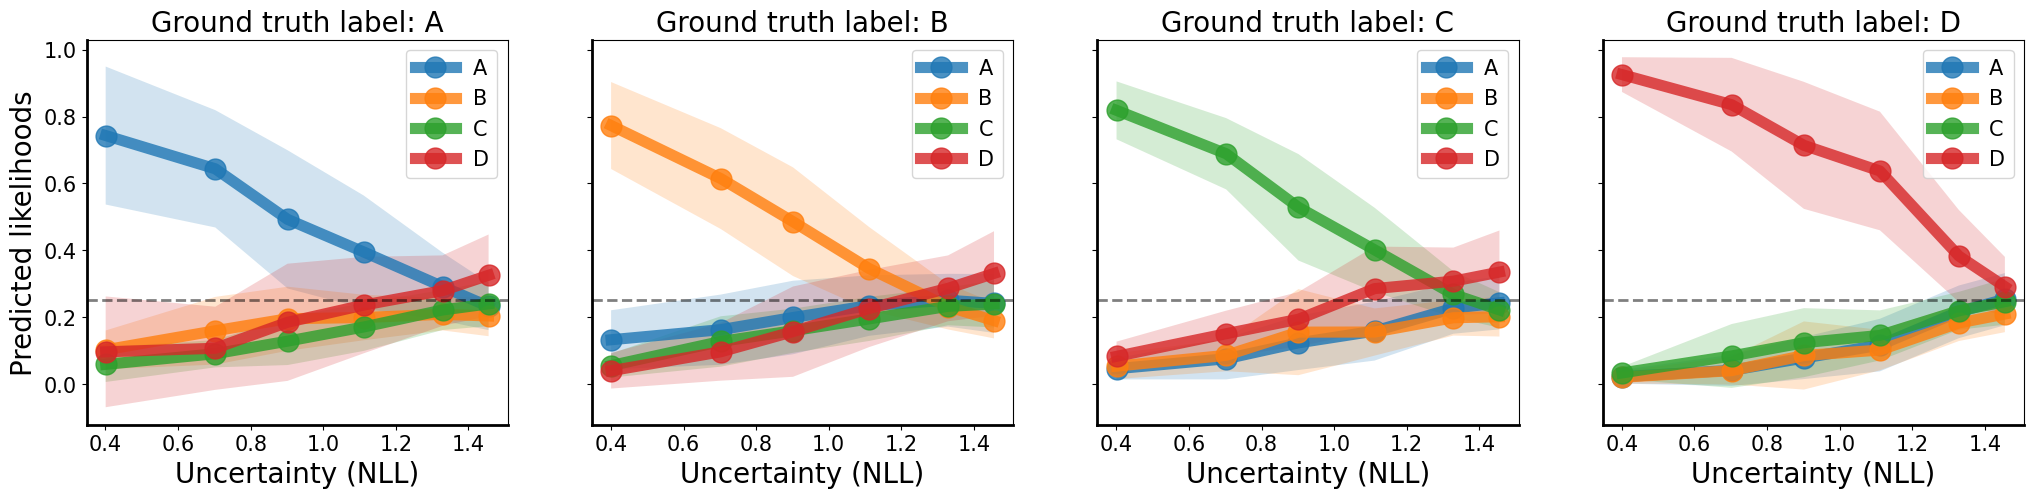

In [5]:

model_path = "ckpts/sft_mmlu_llama7B/checkpoint_01000/hf_model/"

# sft_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
# neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs.max(-1))

sft_eval_A_to_D_probs = (np.load(model_path + f"eval_A_to_D_probs_truthA.npy")[:, 0]+
    np.load(model_path + f"eval_A_to_D_probs_truthB.npy")[:, 1]+
    np.load(model_path + f"eval_A_to_D_probs_truthC.npy")[:, 2]+
    np.load(model_path + f"eval_A_to_D_probs_truthD.npy")[:, 3])/4

neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs)


model_path = "ckpts/sft_mmlu_llama7B/checkpoint_02000/hf_model/"
# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5_certainABCD/checkpoint_01000/hf_model/"

fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True, sharex=True)


# neg_log_likelihood_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]
neg_log_likelihood_bins = [0, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]

# neg_log_likelihood_bins = []
# for percentiles in [0, 5, 10, 20, 40, 60, 100]:
#     print("Percentile: ", percentiles, np.percentile(neg_log_likelihoods, percentiles))
#     neg_log_likelihood_bins.append(np.percentile(neg_log_likelihoods, percentiles))

labels = ["A", "B", "C", "D"]

for j in range(4):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_D_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.2)

    axs[j].legend(fontsize=15)
    axs[j].axhline(0.25, linestyle = "--" ,color = "black",  linewidth=2, alpha=0.5)
    # axs[j].axhline(0, linestyle = "--" ,color = "black",  linewidth=1.5, alpha=0.8)

    # axs[j].set_xticklabels(fontsize=15)
    axs[j].set_yticks([0 ,0.2, 0.4, 0.6, 0.8, 1],)
    axs[j].xaxis.set_tick_params(labelsize=15)
    axs[j].yaxis.set_tick_params(labelsize=15)
    axs[j].set_xlabel("Uncertainty (NLL)", fontsize=20)
    if j==0:
        axs[j].set_ylabel("Predicted likelihoods", fontsize=20)
    axs[j].set_title("Ground truth label: "+labels[j], fontsize=20)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)
#make spines thicker
    

# ax = plt.gca()

# plt.tick_params(axis='both', which='major', width=2)